## Chap 8 - Sampling Methods and the Central Limit Theorem

In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### 8.2

Methods to select a sample include:

<div class="alert alert-info">
<ul>
<li>**SIMPLE RANDOM SAMPLE** - A sample selected so that each item or person in the population has the same chance of being included.</li>

<li>**SYSTEMATIC RANDOM SAMPLE** - A random starting point is selected, and then every kth member of the population is selected.</li>

<li>**STRATIFIED RANDOM SAMPLE** - A population is divided into subgroups, called strata, and a sample is randomly selected from each stratum.</li>

<li>**CLUSTER SAMPLE** - A population is divided into clusters using naturally occurring geographic or other boundaries. Then, clusters are randomly selected and a sample is collected by randomly selecting from each cluster.</li>
</ul>
</div>

#### Self Review 8.1

a) The students are `PRICE, MARY LYNETTE`, `DETLEY, BRIAN HANS` and  3. `MOLTER, KRISTI MARIE`

b) Assume numbers are uniformly distributed. For a randomly drawn value $x$, calculate the modulus $(x\mod 46)$ and map that value to the student drawn. The following is the results of the first 140 values of $x$ and their modulus value.

In [2]:
picker = list()
for i in range(141):
    picker.append((i,(i % 46)))
for c in range(29):
    print(picker[c*5:(c+1)*5])

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]
[(5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
[(10, 10), (11, 11), (12, 12), (13, 13), (14, 14)]
[(15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
[(20, 20), (21, 21), (22, 22), (23, 23), (24, 24)]
[(25, 25), (26, 26), (27, 27), (28, 28), (29, 29)]
[(30, 30), (31, 31), (32, 32), (33, 33), (34, 34)]
[(35, 35), (36, 36), (37, 37), (38, 38), (39, 39)]
[(40, 40), (41, 41), (42, 42), (43, 43), (44, 44)]
[(45, 45), (46, 0), (47, 1), (48, 2), (49, 3)]
[(50, 4), (51, 5), (52, 6), (53, 7), (54, 8)]
[(55, 9), (56, 10), (57, 11), (58, 12), (59, 13)]
[(60, 14), (61, 15), (62, 16), (63, 17), (64, 18)]
[(65, 19), (66, 20), (67, 21), (68, 22), (69, 23)]
[(70, 24), (71, 25), (72, 26), (73, 27), (74, 28)]
[(75, 29), (76, 30), (77, 31), (78, 32), (79, 33)]
[(80, 34), (81, 35), (82, 36), (83, 37), (84, 38)]
[(85, 39), (86, 40), (87, 41), (88, 42), (89, 43)]
[(90, 44), (91, 45), (92, 0), (93, 1), (94, 2)]
[(95, 3), (96, 4), (97, 5), (98, 6), (99, 7)]
[(100, 8), (101, 9

In this case, pick students `43 - WILLIAMS, WENDY A`, `40 - WALASINSKI, MICHAEL` and `10 - EDINGER, SUSAN KEE`.

In [3]:
print((2711 % 46), (8182 % 46), (79866 % 46))

43 40 10


c) Calculate $59 \mod 46 = 13$ and pick `13 - GAGHEN, PAMELA LYNN`

In [4]:
print((59 % 46))

13


$\diamond$

#### Self Review 8.2

In [5]:
x = 4
l = []
for i in range(45//9):
    l.append(x + 9*i-1)
print(l)

[3, 12, 21, 30, 39]


The students are `03 - BERRY, CHRISTOPHER G`, `12 - FRANCIS, JAMES P`, `21 - KOPP, BRIDGETTE ANN`, `30 - POTEAU, KRIS E`, `39 - SWETYE, LYNN MICHELE`.

$\diamond$

### 8.3

<div class="alert alert-info">
**SAMPLING ERROR** - The difference between a sample statistic and its corresponding population parameter.
</div>

### 8.4
<div class="alert alert-info">
**SAMPLING DISTRIBUTION OF THE SAMPLE MEAN** - A probability distribution of all possible sample means of a given sample size.
</div>

#### Self Review 8.3

In [6]:
x = ([('Mr. Snow', 20), ('Ms. Tolson', 22), ('Mr. Kraft', 26), 
      ('Ms. Irwin', 24), ('Mr. Jones', 28)])
x_df = pd.DataFrame(x, columns=['Name', 'Years'])
x_df['Years'] = x_df['Years'].astype(int)
display(x_df)

,Name,Years
0,Mr. Snow,20
1,Ms. Tolson,22
2,Mr. Kraft,26
3,Ms. Irwin,24
4,Mr. Jones,28


a) The number of possible samples $={5\choose 2} = \frac{5!}{2!\,3!} =  \frac{120} {12} = 10$ 

b) To find all the possible samples and the mean of `Years` for each sample,

In [7]:
# Find all samples of size 2
d_values = [k[0] + k[1] for k in itertools.combinations(x,2)]
# Create a new df with each sample and calculate its mean
s_df = pd.DataFrame(d_values, 
                    columns = ['Name1', 'Years1', 'Name2', 'Years2'])
s_df['Years'] = s_df['Years1'].astype(str) + ' , ' + s_df['Years2'].astype(str)
s_df['YearsMean'] = s_df[['Years1', 'Years2']].mean(axis=1)
display(s_df[['Name1', 'Name2', 'Years', 'YearsMean']])

,Name1,Name2,Years,YearsMean
0,Mr. Snow,Ms. Tolson,"20 , 22",21.0
1,Mr. Snow,Mr. Kraft,"20 , 26",23.0
2,Mr. Snow,Ms. Irwin,"20 , 24",22.0
3,Mr. Snow,Mr. Jones,"20 , 28",24.0
4,Ms. Tolson,Mr. Kraft,"22 , 26",24.0
5,Ms. Tolson,Ms. Irwin,"22 , 24",23.0
6,Ms. Tolson,Mr. Jones,"22 , 28",25.0
7,Mr. Kraft,Ms. Irwin,"26 , 24",25.0
8,Mr. Kraft,Mr. Jones,"26 , 28",27.0
9,Ms. Irwin,Mr. Jones,"24 , 28",26.0


c) To create the sampling distribution,

In [8]:
s_mean_count = s_df.groupby(['YearsMean']).size().reset_index(name='n')
s_mean_count['p'] = s_mean_count['n']/s_mean_count['n'].sum()
s_mean_count.loc[7] = ['Total',s_mean_count['n'].sum(),s_mean_count['p'].sum()]
display(s_mean_count)

,YearsMean,n,p
0,21,1,0.1
1,22,1,0.1
2,23,2,0.2
3,24,2,0.2
4,25,2,0.2
5,26,1,0.1
6,27,1,0.1
7,Total,10,1.0


d)

In [9]:
popn_mean = x_df['Years'].mean()
print(popn_mean)
sampling_mean = s_df['YearsMean'].mean()
print(sampling_mean)

24.0
24.0


The population mean, $\mu$ and the sampling mean, $\mu_{\bar{X}}$ are the same.

e) 

In [10]:
print(x_df['Years'].sort_values().unique())
print(s_df['YearsMean'].sort_values().unique())

[20 22 24 26 28]
[21. 22. 23. 24. 25. 26. 27.]


The populations take values from 20 to 28 while the values of the sample mean are from 21 to 27. (Which is smaller than that of the population values).

f) No.

g) 

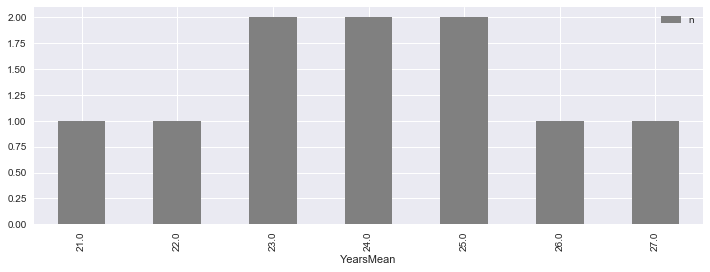

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
s_mean_count[:-1].plot(kind='bar', x='YearsMean',
                  y='n', color='grey', ax=ax)
plt.show()

Yes.

$\diamond$

### 8.5

<div class="alert alert-info">
<p>**CENTRAL LIMIT THEOREM** - If all samples of a particular size are selected from any population, the sampling distribution of the sample mean is approximately a normal distribution. This approximation improves with larger samples.</p>
</div>

<div class="alert alert-success">
<p>**STANDARD ERROR OF THE MEAN** - Standard deviation of the sampling distribution of the sample mean. It is calculated as:</p>

$$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt X}$$
</div>


#### Self Review 8.4

[3.8, 3.0, 6.0, 7.4, 2.0, 2.6, 7.2, 4.6, 2.4, 7.0]


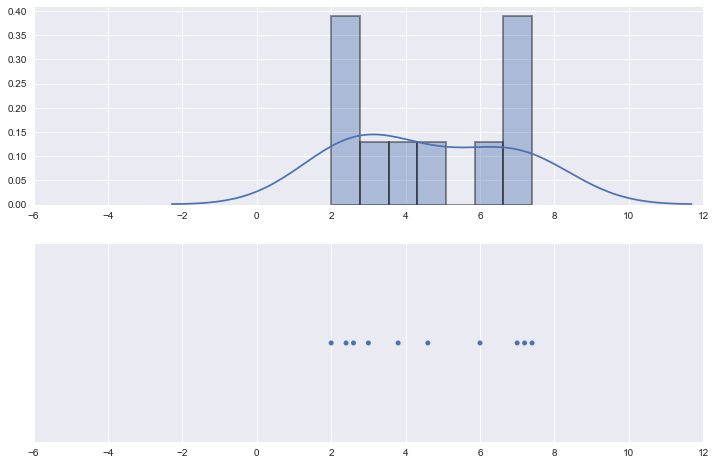

The mean of the 10 sample means is 4.600


In [12]:
svc_lengths = pd.Series([11, 4, 18, 2, 1, 2, 0, 2, 2, 4, 3, 4, 1, 2, 2, 3, 3, 19, 8, 3, 7, 1, 0, 2, 7, 0, 4, 5, 1, 14, 16, 8, 9, 1, 1, 2, 5, 10, 2, 3,])
# Select 10 samples of 5 employees
svc_samples = []
num_samples = 10
for i in range(num_samples):
    svc_samples.append(svc_lengths.sample(5))
# Mean of each sample
means = []
for spl in svc_samples:
    means.append(spl.mean())
means_series = pd.Series(means)
print(list(means_series))
fig = plt.figure(figsize=(12, 8))
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)
sns.distplot(means_series, hist_kws=dict(edgecolor="k", linewidth=2),
            bins=7,ax=ax1)
sns.swarmplot(means_series, ax=ax2)
ax1.set_xlim(-6,12)
ax2.set_xlim(-6,12)
plt.show()
print("The mean of the {:d} sample means is {:.3f}".format(
num_samples, means_series.mean()))

$\diamond$

### 8.6

The $z$-value is used to determine if the difference between the population parameter and the sample statistic is random sampling error and due to chance, or it is statistically significant.

We now attempt to calculate the probability that a sample mean falls within a certain range. By leveraging on the formula to find the $z$-value, $z=\frac{X-\mu} \sigma$, the modified formula for the sample mean is:

<div class="alert alert-success">
**FINDING $z$-value of $\bar X$ when POPULATION STANDARD DEVIATION IS KNOWN**:

$$z = \frac{\bar X - \mu}{\frac{\sigma}{\sqrt n}}$$

where $\bar X$ is the sample mean, $\mu$ is the population mean, $\sigma$ is the population standard deviation and $n$ is the number of samples.
</div>

#### Example:
For a manufacturing process, given $X \sim (\mu=31.2, \sigma = 0.4)$, a sample $n=16$ is drawn and the sample mean $\bar X = 31.38$. To determine if this is unlikely, calculate the $z$-value:

In [13]:
z = (31.38 - 31.2)/ (0.4/16**0.5)
print(z)
print(sp.stats.norm.sf(z))

1.7999999999999972
0.03593031911292602


Since $\Pr (Z>1.8) = 0.036$, it is unlikely that we select a sample that has $\bar X>31.38$. We conclude that the process is putting too much soda in each bottle.

#### Self Review 8.5

Given now that $\bar X = 31.08$

In [14]:
z2 = (31.08-31.2) / (0.4/16**0.5)
print(z2)
print(sp.stats.norm.cdf(z2))

-1.20000000000001
0.11506967022170633


$z$-value is $-1.20$, chance of $z$-value smaller than $-1.2$ is $11.5\%$. It is unlikely that there are so many bottles underfilled.

$\diamond$

**References:**

Lind, Marchal, Wathen (2012). Statistical Techniques in Business and Economics (McGraw-Hill)